# GPU-enhanced GP modelling

In [4]:
import numpy as np
import scipy
import time
import matplotlib.pyplot as plt
from GPSat.models.sklearn_models import sklearnGPRModel
from GPSat.models.gpflow_models import GPflowGPRModel

/opt/homebrew/Caskroom/miniforge/base/envs/gpsat2/lib/python3.8/site-packages/gpflow/experimental/utils.py:42: UserWarning: You're calling gpflow.experimental.check_shapes.decorator.check_shapes which is considered *experimental*. Expect: breaking changes, poor documentation, and bugs.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/gpsat2/lib/python3.8/site-packages/gpflow/experimental/utils.py:42: UserWarning: You're calling gpflow.experimental.check_shapes.inheritance.inherit_check_shapes which is considered *experimental*. Expect: breaking changes, poor documentation, and bugs.
  warn(


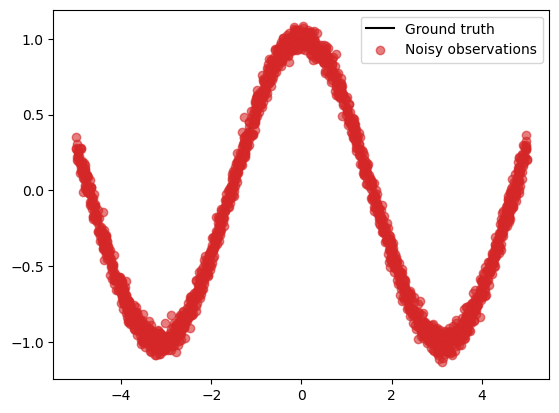

In [5]:
# Set random seed
np.random.seed(0)

# Generate data
N = 2000
L = 5
noise_std = 0.05

X_grid = np.linspace(-L, L, 100)
X = np.random.uniform(-L, L, (N,))
f = lambda x: np.cos(x)
epsilon = noise_std * np.random.randn(N)

y = f(X) + epsilon
f_truth = f(X_grid) # Ground truth

# Plot
plt.plot(X_grid, f_truth, 'k', zorder=1, label='Ground truth')
plt.scatter(X, y, color='C3', alpha=0.6, zorder=2, label='Noisy observations')
plt.legend()

In [6]:
gpr = sklearnGPRModel(coords=X, obs=y, kernel='RBF', verbose=False)
_ = gpr.optimise_parameters()
pred_dict = gpr.predict(X_grid[:,None])

'__init__': 0.053 seconds
'optimise_parameters': 18.378 seconds
'predict': 0.014 seconds


In [7]:
gpr = GPflowGPRModel(coords=X, obs=y, kernel='RBF', verbose=False)
_ = gpr.optimise_parameters()
pred_dict = gpr.predict(X_grid[:,None])

setting lengthscales to: [1.]
'__init__': 0.212 seconds


/opt/homebrew/Caskroom/miniforge/base/envs/gpsat2/lib/python3.8/site-packages/gpflow/experimental/utils.py:42: UserWarning: You're calling gpflow.experimental.check_shapes.checker.ShapeChecker.__init__ which is considered *experimental*. Expect: breaking changes, poor documentation, and bugs.
  warn(


'optimise_parameters': 30.097 seconds
'predict': 0.556 seconds
